In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle
import sklearn
from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder, StandardScaler, power_transform
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, RandomForestClassifier, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import FunctionTransformer,OneHotEncoder
import warnings
from sklearn.compose import ColumnTransformer
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression,Ridge,Lasso

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv')

In [3]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
df.shape

(4177, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [6]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [7]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [8]:
df.duplicated().sum()

0

In [9]:
df.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


In [10]:
df.corr()['Rings']

Length            0.556720
Diameter          0.574660
Height            0.557467
Whole weight      0.540390
Shucked weight    0.420884
Viscera weight    0.503819
Shell weight      0.627574
Rings             1.000000
Name: Rings, dtype: float64

# EDA

In [11]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [12]:
df['Rings'].value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
24      2
27      2
1       1
25      1
2       1
26      1
29      1
Name: Rings, dtype: int64

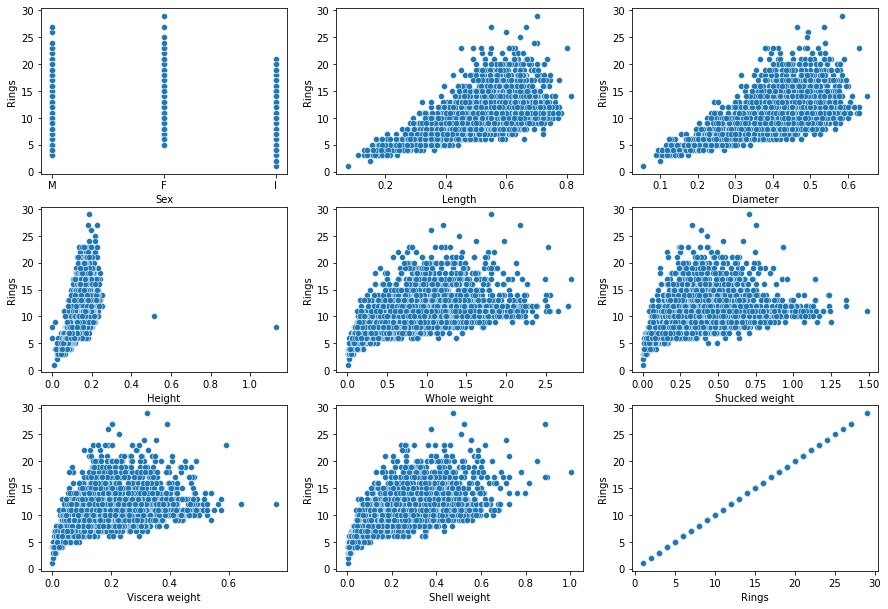

In [13]:
plt.figure(figsize=(15,14))
for index,colum in enumerate(df.keys()):
    plt.subplot(4,3,index+1)
    sns.scatterplot(df[colum],df['Rings'])
    plt.xlabel(colum)
plt.show()

In [14]:
df['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

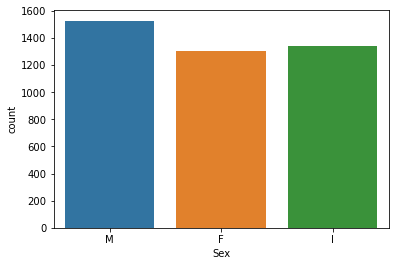

In [15]:
sns.countplot(df['Sex'])

# checking distribution

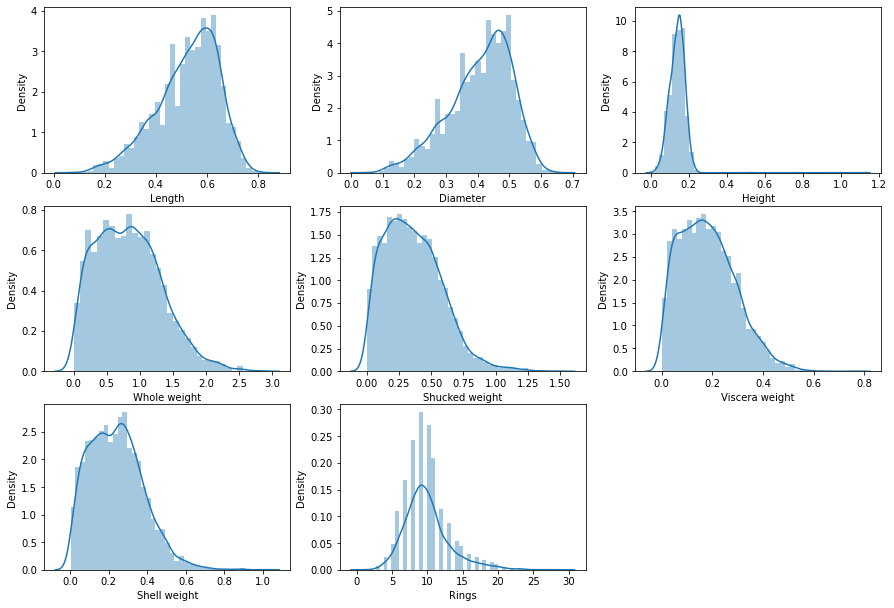

In [16]:
plt.figure(figsize=(15,14))
for index,colum in enumerate(df.keys()[1:]):
    plt.subplot(4,3,index+1)
    sns.distplot(df[colum])
    plt.xlabel(colum)
plt.show()

# Checking Outliers

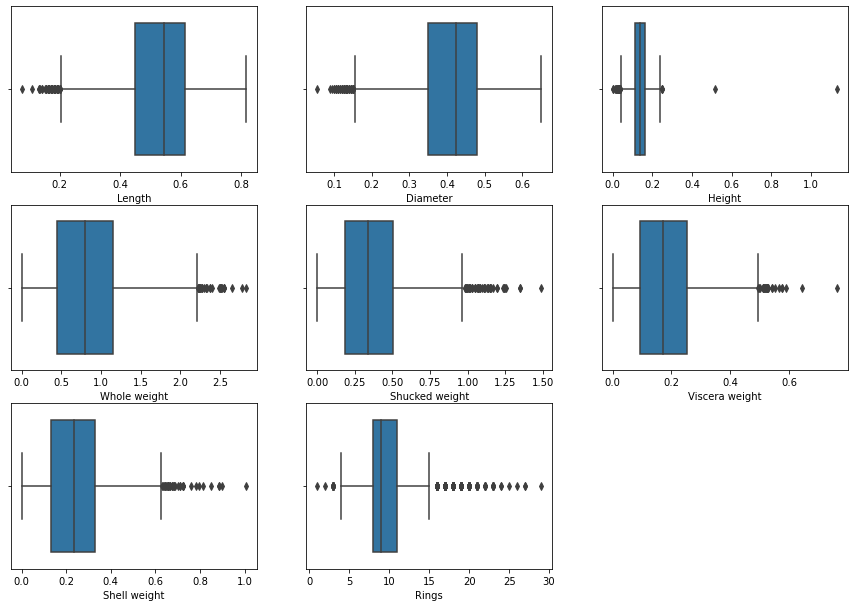

In [17]:
plt.figure(figsize=(15,14))
for index,colum in enumerate(df.keys()[1:]):
    plt.subplot(4,3,index+1)
    sns.boxplot(df[colum])
    plt.xlabel(colum)
plt.show()

In [18]:
df.skew()

Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

# Removing outliers

In [19]:
# These all columns has skewness hence removing outliers using IQR 

remove_outliers= [ 'Length','Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings']

In [20]:
for i in remove_outliers:
    Q3 = df[i].quantile(0.75)
    Q1 = df[i].quantile(0.25)
    IQR = Q3-Q1
    upper_limit = Q3 + 1.5 * IQR 
    lower_limit = Q1 - 1.5 * IQR
    (df[(df[i]>upper_limit) | (df[i]<lower_limit)])
    df[i] = np.where(df[i] > upper_limit , upper_limit ,np.where(df[i] < lower_limit , lower_limit , df[i]))

In [21]:
# checking box plot after removing outliers

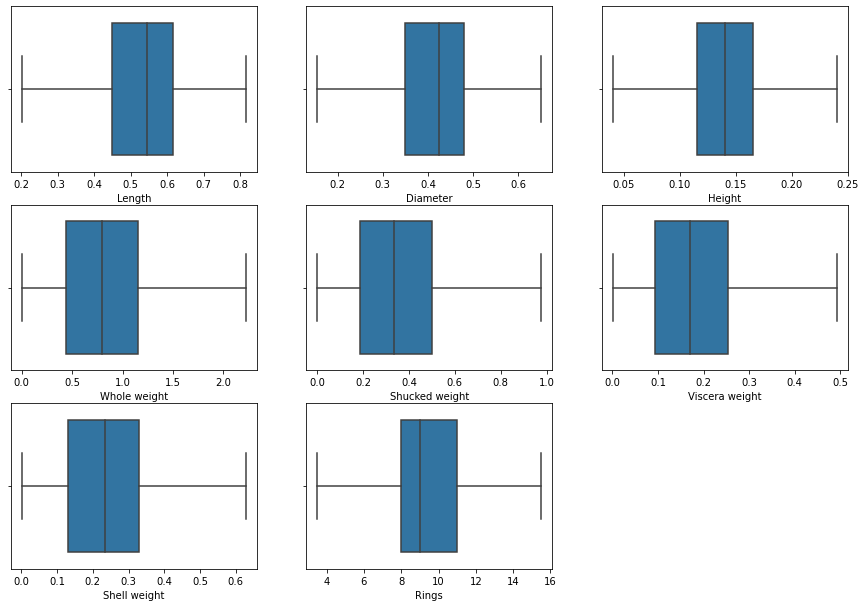

In [22]:
plt.figure(figsize=(15,14))
for index,colum in enumerate(df.keys()[1:]):
    plt.subplot(4,3,index+1)
    sns.boxplot(df[colum])
    plt.xlabel(colum)
plt.show()

In [23]:
# checking distribution after removing outlies

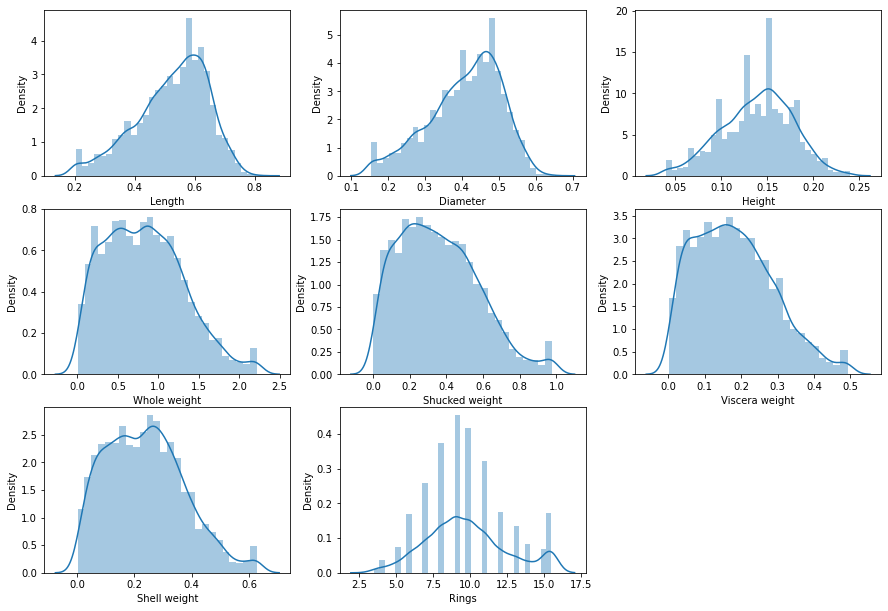

In [24]:
plt.figure(figsize=(15,14))
for index,colum in enumerate(df.keys()[1:]):
    plt.subplot(4,3,index+1)
    sns.distplot(df[colum])
    plt.xlabel(colum)
plt.show()

In [25]:
df.skew()

Length           -0.585183
Diameter         -0.548711
Height           -0.217345
Whole weight      0.468875
Shucked weight    0.546594
Viscera weight    0.517749
Shell weight      0.458793
Rings             0.353772
dtype: float64

In [26]:
to_transform_left =['Length','Diameter']
to_transform_right = ['Whole weight','Shucked weight','Viscera weight','Shell weight']

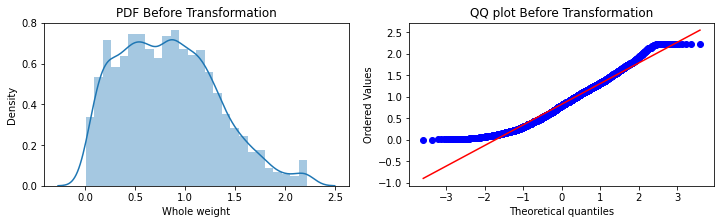

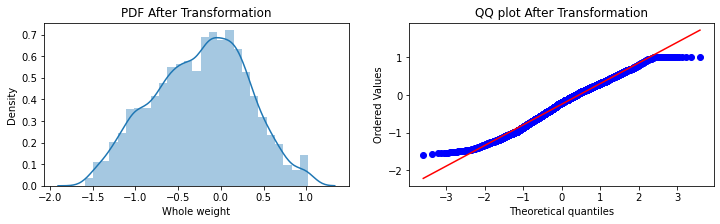

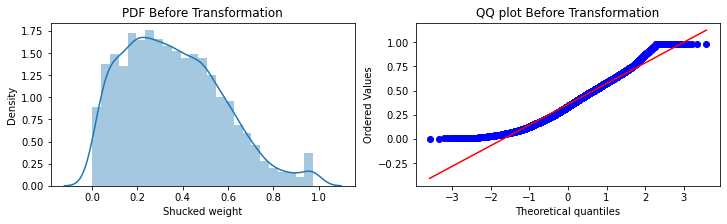

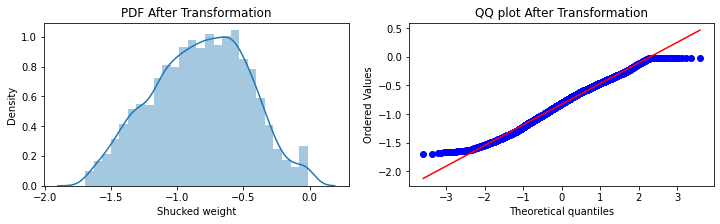

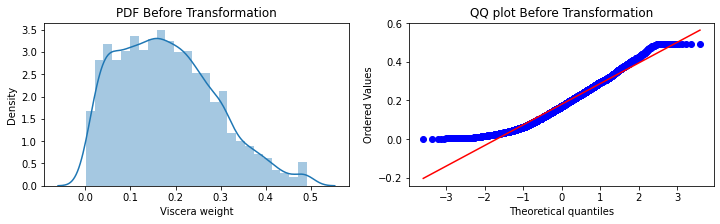

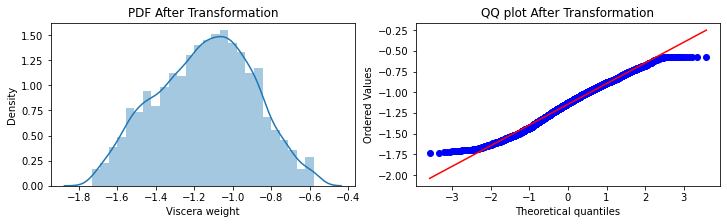

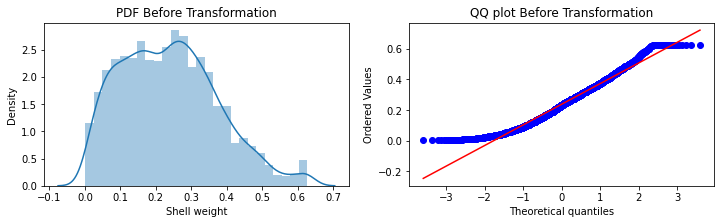

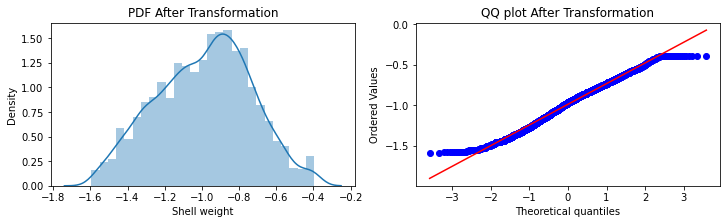

In [27]:
# performing Boxcox transformation on right skewed columns
for i, j in enumerate(to_transform_right):
    plt.figure(figsize=(12,3))
    plt.subplot(2,3,i+1)
    plt.subplot(1,2,1)
    sns.distplot(df[j])
    plt.title('PDF Before Transformation')
    plt.subplot(1,2,2)
    stats.probplot(df[j], dist="norm", plot=plt)
    plt.title('QQ plot Before Transformation')
    df[j],params = stats.boxcox(df[j]+0.01)
    plt.figure(figsize=(12,3))
    plt.subplot(1,2,1)
    sns.distplot(df[j])
    plt.title('PDF After Transformation')
    plt.subplot(1,2,2)
    stats.probplot(df[j], dist="norm", plot=plt)
    plt.title('QQ plot After Transformation')
    plt.show()

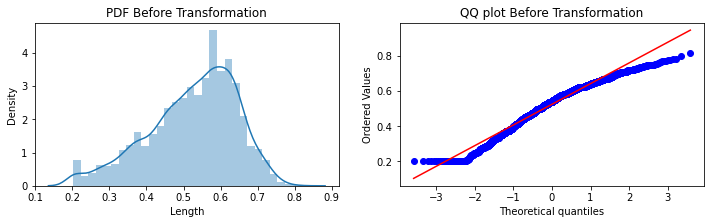

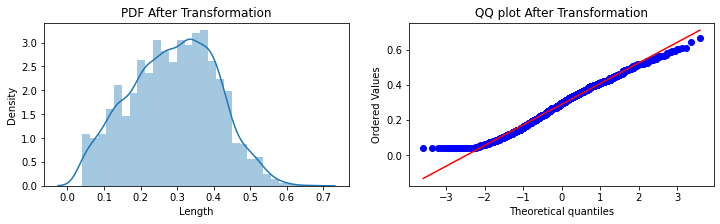

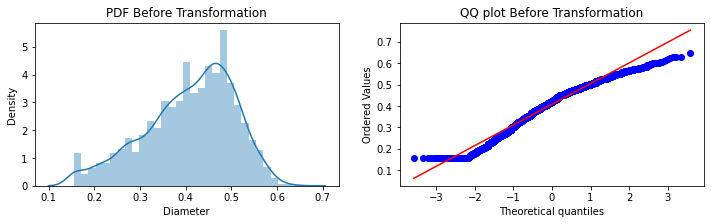

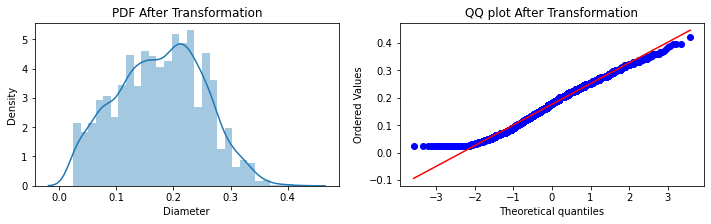

In [28]:
# performing square transformation on left skewed columns
for i, j in enumerate(to_transform_left):
    plt.figure(figsize=(12,3))
    plt.subplot(2,3,i+1)
    plt.subplot(1,2,1)
    sns.distplot(df[j])
    plt.title('PDF Before Transformation')
    plt.subplot(1,2,2)
    stats.probplot(df[j], dist="norm", plot=plt)
    plt.title('QQ plot Before Transformation')
    
    df[j] = df[j]**2
    plt.figure(figsize=(12,3))
    plt.subplot(1,2,1)
    sns.distplot(df[j])
    plt.title('PDF After Transformation')
    plt.subplot(1,2,2)
    stats.probplot(df[j], dist="norm", plot=plt)
    plt.title('QQ plot After Transformation')
    plt.show()

In [29]:
df.skew()

Length           -0.056348
Diameter         -0.012983
Height           -0.217345
Whole weight     -0.113367
Shucked weight   -0.097394
Viscera weight   -0.093029
Shell weight     -0.095379
Rings             0.353772
dtype: float64

In [36]:
df.corr()['Rings']

Length            0.580490
Diameter          0.598535
Height            0.648440
Whole weight      0.613909
Shucked weight    0.519693
Viscera weight    0.592330
Shell weight      0.679891
Rings             1.000000
Name: Rings, dtype: float64

In [37]:
# since Diameter and Viscera weight has multicolinearity we can drop one of the column from the data set

# Splitting data 

In [83]:
X=df.iloc[:,:-1]
X=X.drop(['Viscera weight'],axis=1)

In [84]:
X

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Shell weight
0,2,0.207025,0.133225,0.095,-0.539109,-1.008092,-1.128609
1,2,0.122500,0.070225,0.090,-0.979409,-1.295405,-1.325817
2,0,0.280900,0.176400,0.135,-0.337416,-0.947247,-1.007764
3,2,0.193600,0.133225,0.125,-0.536486,-1.025889,-1.117881
4,1,0.108900,0.065025,0.080,-1.017808,-1.323923,-1.371036
...,...,...,...,...,...,...,...
4172,0,0.319225,0.202500,0.165,-0.105349,-0.754921,-0.936626
4173,2,0.348100,0.193600,0.135,-0.024123,-0.651023,-0.916526
4174,2,0.360000,0.225625,0.205,0.179296,-0.530746,-0.837063
4175,0,0.390625,0.235225,0.150,0.102309,-0.523415,-0.856638


In [85]:
y =df.iloc[:,-1]

In [86]:
y

0       15.0
1        7.0
2        9.0
3       10.0
4        7.0
        ... 
4172    11.0
4173    10.0
4174     9.0
4175    10.0
4176    12.0
Name: Rings, Length: 4177, dtype: float64

In [87]:
#label encoding of 'Sex' feature
label=LabelEncoder()
X["Sex"] = label.fit_transform(df["Sex"])

In [88]:
X

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Shell weight
0,2,0.207025,0.133225,0.095,-0.539109,-1.008092,-1.128609
1,2,0.122500,0.070225,0.090,-0.979409,-1.295405,-1.325817
2,0,0.280900,0.176400,0.135,-0.337416,-0.947247,-1.007764
3,2,0.193600,0.133225,0.125,-0.536486,-1.025889,-1.117881
4,1,0.108900,0.065025,0.080,-1.017808,-1.323923,-1.371036
...,...,...,...,...,...,...,...
4172,0,0.319225,0.202500,0.165,-0.105349,-0.754921,-0.936626
4173,2,0.348100,0.193600,0.135,-0.024123,-0.651023,-0.916526
4174,2,0.360000,0.225625,0.205,0.179296,-0.530746,-0.837063
4175,0,0.390625,0.235225,0.150,0.102309,-0.523415,-0.856638


In [89]:
# performing standard scaler on whole data

In [91]:
step1 = ColumnTransformer([
    ('standardscaler',StandardScaler(), slice(0,X.shape[1]+1))
     ],remainder='passthrough')

X=step1.fit_transform(X)

In [92]:
X

array([[ 1.15198011e+00, -6.96971889e-01, -5.68900349e-01, ...,
        -5.38902164e-01, -4.98420989e-01, -5.49623335e-01],
       [ 1.15198011e+00, -1.41456329e+00, -1.40059763e+00, ...,
        -1.33902408e+00, -1.29282816e+00, -1.32134290e+00],
       [-1.28068972e+00, -6.97957353e-02,  1.07631933e-03, ...,
        -1.72381704e-01, -3.30187785e-01, -7.67298067e-02],
       ...,
       [ 1.15198011e+00,  6.01739070e-01,  6.50922330e-01, ...,
         7.66599494e-01,  8.21416213e-01,  5.91257997e-01],
       [-1.28068972e+00,  8.61735953e-01,  7.77657154e-01, ...,
         6.26696240e-01,  8.41685526e-01,  5.14657035e-01],
       [ 1.15198011e+00,  1.82510399e+00,  1.73872957e+00, ...,
         1.93410257e+00,  2.16456411e+00,  1.65945019e+00]])

# selecting best random state

# Linear Regression

In [96]:
lr=LinearRegression()

In [99]:
for i in range(0,100):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=i)
    lr.fit(X_train,y_train)
    pred_train = lr.predict(X_train)
    pred_test = lr.predict(X_test)
    print('At random state ',i, 'the training accuracy is: ',r2_score(y_train,pred_train))
    print('At random state ',i, 'the training accuracy is: ',r2_score(y_test,pred_test))  
    print()

At random state  0 the training accuracy is:  0.5604465205713784
At random state  0 the training accuracy is:  0.5876433759713677

At random state  1 the training accuracy is:  0.5731520780817273
At random state  1 the training accuracy is:  0.5403236740995422

At random state  2 the training accuracy is:  0.5585641278338731
At random state  2 the training accuracy is:  0.5935112961495634

At random state  3 the training accuracy is:  0.5746956863862891
At random state  3 the training accuracy is:  0.5326940629578287

At random state  4 the training accuracy is:  0.5734159808008292
At random state  4 the training accuracy is:  0.5354195061000198

At random state  5 the training accuracy is:  0.5753133865121038
At random state  5 the training accuracy is:  0.5316773934189594

At random state  6 the training accuracy is:  0.5615590256520709
At random state  6 the training accuracy is:  0.5868536232566378

At random state  7 the training accuracy is:  0.5682942373398535
At random state  7

At random state  66 the training accuracy is:  0.5435942961594901

At random state  67 the training accuracy is:  0.5691433304844397
At random state  67 the training accuracy is:  0.555976722923528

At random state  68 the training accuracy is:  0.5728048409083258
At random state  68 the training accuracy is:  0.5411041814705433

At random state  69 the training accuracy is:  0.5653691836835255
At random state  69 the training accuracy is:  0.5714465976457533

At random state  70 the training accuracy is:  0.5662308282345394
At random state  70 the training accuracy is:  0.5687209739241221

At random state  71 the training accuracy is:  0.568547565901063
At random state  71 the training accuracy is:  0.5581981860488932

At random state  72 the training accuracy is:  0.5688964390042949
At random state  72 the training accuracy is:  0.5569458284961675

At random state  73 the training accuracy is:  0.5704933960840414
At random state  73 the training accuracy is:  0.5510583701957739

At r

# Ridge

In [104]:
rid = Ridge()

In [105]:
for i in range(0,100):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=i)
    rid.fit(X_train,y_train)
    pred_train = rid.predict(X_train)
    pred_test = rid.predict(X_test)
    print('At random state ',i, 'the training accuracy is: ',r2_score(y_train,pred_train))
    print('At random state ',i, 'the training accuracy is: ',r2_score(y_test,pred_test))  
    print()

At random state  0 the training accuracy is:  0.5604202480221603
At random state  0 the training accuracy is:  0.5883274221432788

At random state  1 the training accuracy is:  0.573129734941523
At random state  1 the training accuracy is:  0.5404138992048313

At random state  2 the training accuracy is:  0.5585329931500076
At random state  2 the training accuracy is:  0.5944993363679306

At random state  3 the training accuracy is:  0.5746777045618915
At random state  3 the training accuracy is:  0.5324296645964692

At random state  4 the training accuracy is:  0.5733941799045765
At random state  4 the training accuracy is:  0.5358182568653642

At random state  5 the training accuracy is:  0.5752968476598792
At random state  5 the training accuracy is:  0.5312381768015655

At random state  6 the training accuracy is:  0.5615383174629659
At random state  6 the training accuracy is:  0.5869253097276143

At random state  7 the training accuracy is:  0.5682728644307699
At random state  7 

At random state  66 the training accuracy is:  0.544675904675606

At random state  67 the training accuracy is:  0.5691208497031435
At random state  67 the training accuracy is:  0.556137871839835

At random state  68 the training accuracy is:  0.572785761083777
At random state  68 the training accuracy is:  0.5410309241154252

At random state  69 the training accuracy is:  0.5653455188802036
At random state  69 the training accuracy is:  0.5716613133767945

At random state  70 the training accuracy is:  0.566211794048505
At random state  70 the training accuracy is:  0.5685068775928128

At random state  71 the training accuracy is:  0.568530914979303
At random state  71 the training accuracy is:  0.5577135128416045

At random state  72 the training accuracy is:  0.5688782039137281
At random state  72 the training accuracy is:  0.5565923224957042

At random state  73 the training accuracy is:  0.5704747630339453
At random state  73 the training accuracy is:  0.550776989309838

At rando

# Lasso

In [106]:
lass = Lasso()

In [107]:
for i in range(0,100):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=i)
    lass.fit(X_train,y_train)
    pred_train = lass.predict(X_train)
    pred_test = lass.predict(X_test)
    print('At random state ',i, 'the training accuracy is: ',r2_score(y_train,pred_train))
    print('At random state ',i, 'the training accuracy is: ',r2_score(y_test,pred_test))  
    print()

At random state  0 the training accuracy is:  0.32304559105011776
At random state  0 the training accuracy is:  0.3299087492038456

At random state  1 the training accuracy is:  0.34138390744769864
At random state  1 the training accuracy is:  0.32003372864737367

At random state  2 the training accuracy is:  0.31378243828414043
At random state  2 the training accuracy is:  0.3334035718650482

At random state  3 the training accuracy is:  0.34483637271076306
At random state  3 the training accuracy is:  0.3109958364350617

At random state  4 the training accuracy is:  0.34147502455679735
At random state  4 the training accuracy is:  0.33411554340770167

At random state  5 the training accuracy is:  0.34205193408134804
At random state  5 the training accuracy is:  0.3150536114416692

At random state  6 the training accuracy is:  0.3262893669018704
At random state  6 the training accuracy is:  0.33507676809170217

At random state  7 the training accuracy is:  0.3327230840366515
At random

At random state  69 the training accuracy is:  0.3197923042374844

At random state  70 the training accuracy is:  0.3336102968200808
At random state  70 the training accuracy is:  0.3230898236475347

At random state  71 the training accuracy is:  0.33227800759585413
At random state  71 the training accuracy is:  0.32621854535886163

At random state  72 the training accuracy is:  0.33745327001955483
At random state  72 the training accuracy is:  0.32076877370368106

At random state  73 the training accuracy is:  0.33632220744363406
At random state  73 the training accuracy is:  0.3212939554621528

At random state  74 the training accuracy is:  0.3389999248755705
At random state  74 the training accuracy is:  0.3149539913481262

At random state  75 the training accuracy is:  0.34007864228537166
At random state  75 the training accuracy is:  0.3295636329332211

At random state  76 the training accuracy is:  0.3332529759319962
At random state  76 the training accuracy is:  0.33880600576595

# Support vector Regressor

In [100]:
srv = SVR()

In [101]:
for i in range(0,100):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=i)
    srv.fit(X_train,y_train)
    pred_train = srv.predict(X_train)
    pred_test = srv.predict(X_test)
    print('At random state ',i, 'the training accuracy is: ',r2_score(y_train,pred_train))
    print('At random state ',i, 'the training accuracy is: ',r2_score(y_test,pred_test))  
    print()

At random state  0 the training accuracy is:  0.6026061881811571
At random state  0 the training accuracy is:  0.6296500244981609

At random state  1 the training accuracy is:  0.615877418696472
At random state  1 the training accuracy is:  0.5737269496378616

At random state  2 the training accuracy is:  0.6035150145676617
At random state  2 the training accuracy is:  0.6255908936054724

At random state  3 the training accuracy is:  0.6171326866202652
At random state  3 the training accuracy is:  0.569614258170918

At random state  4 the training accuracy is:  0.6164654539452803
At random state  4 the training accuracy is:  0.5836859383959891

At random state  5 the training accuracy is:  0.615311972394152
At random state  5 the training accuracy is:  0.5794795700609272

At random state  6 the training accuracy is:  0.6069037644232402
At random state  6 the training accuracy is:  0.6285542930956929

At random state  7 the training accuracy is:  0.6109145846376325
At random state  7 th

At random state  62 the training accuracy is:  0.6080827920002708
At random state  62 the training accuracy is:  0.6134066264930562

At random state  63 the training accuracy is:  0.6109455411985465
At random state  63 the training accuracy is:  0.5974288297347805

At random state  64 the training accuracy is:  0.6163379597922289
At random state  64 the training accuracy is:  0.5785610230400386

At random state  65 the training accuracy is:  0.6099512867502284
At random state  65 the training accuracy is:  0.5936041671499158

At random state  66 the training accuracy is:  0.6120389590295297
At random state  66 the training accuracy is:  0.5955250913698091

At random state  67 the training accuracy is:  0.611009321279723
At random state  67 the training accuracy is:  0.59641890724461

At random state  68 the training accuracy is:  0.6174037551169336
At random state  68 the training accuracy is:  0.5792867549147054

At random state  69 the training accuracy is:  0.6097757356127507
At ran

In [117]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=99)

In [118]:
srv = SVR()

In [119]:
srv.fit(X_train,y_train)

SVR()

In [121]:
train_pred =srv.predict(X_test)

In [122]:
print(r2_score(y_test,train_pred))

0.6044334274976738


In [123]:
# cross validation

In [126]:
train_accuracy = r2_score(y_train,pred_train)
test_accuracy = r2_score(y_test,pred_test)
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_scr = cross_val_score(srv,X,y,cv=j)
    cv_mean = cv_scr.mean()
    print('At Cv ',j,'the cv score is ',cv_mean, 'and accuracy score for training is ',train_accuracy,'and accuracy for testing is ',test_accuracy)
    print()

At Cv  2 the cv score is  0.5900730482495016 and accuracy score for training is  0.6878672813254667 and accuracy for testing is  0.5252997224319157

At Cv  3 the cv score is  0.5859676284963166 and accuracy score for training is  0.6878672813254667 and accuracy for testing is  0.5252997224319157

At Cv  4 the cv score is  0.5542528109860816 and accuracy score for training is  0.6878672813254667 and accuracy for testing is  0.5252997224319157

At Cv  5 the cv score is  0.5391144416093507 and accuracy score for training is  0.6878672813254667 and accuracy for testing is  0.5252997224319157

At Cv  6 the cv score is  0.5467910326228546 and accuracy score for training is  0.6878672813254667 and accuracy for testing is  0.5252997224319157

At Cv  7 the cv score is  0.558165525129869 and accuracy score for training is  0.6878672813254667 and accuracy for testing is  0.5252997224319157

At Cv  8 the cv score is  0.5360218917912796 and accuracy score for training is  0.6878672813254667 and acc

# GradientBoostingRegressor

In [109]:
GBR = GradientBoostingRegressor()

In [110]:
for i in range(0,100):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=i)
    GBR.fit(X_train,y_train)
    pred_train = GBR.predict(X_train)
    pred_test = GBR.predict(X_test)
    print('At random state ',i, 'the training accuracy is: ',r2_score(y_train,pred_train))
    print('At random state ',i, 'the training accuracy is: ',r2_score(y_test,pred_test))  
    print()

At random state  0 the training accuracy is:  0.6724737908087229
At random state  0 the training accuracy is:  0.6242725943099651

At random state  1 the training accuracy is:  0.6807967637653716
At random state  1 the training accuracy is:  0.5755817929211469

At random state  2 the training accuracy is:  0.6678393330371147
At random state  2 the training accuracy is:  0.6412313398829776

At random state  3 the training accuracy is:  0.6804227519571207
At random state  3 the training accuracy is:  0.566701852040314

At random state  4 the training accuracy is:  0.6805549548693017
At random state  4 the training accuracy is:  0.5752294455781783

At random state  5 the training accuracy is:  0.6795284288018952
At random state  5 the training accuracy is:  0.5887157349974397

At random state  6 the training accuracy is:  0.6740480077401971
At random state  6 the training accuracy is:  0.6151186778640095

At random state  7 the training accuracy is:  0.6739719309977361
At random state  7 

At random state  62 the training accuracy is:  0.6734253308922513
At random state  62 the training accuracy is:  0.6020678128612933

At random state  63 the training accuracy is:  0.6737529252260368
At random state  63 the training accuracy is:  0.6025597937477529

At random state  64 the training accuracy is:  0.6740938889961695
At random state  64 the training accuracy is:  0.5898115516787039

At random state  65 the training accuracy is:  0.6769935301049895
At random state  65 the training accuracy is:  0.5960096365116607

At random state  66 the training accuracy is:  0.6773842728740068
At random state  66 the training accuracy is:  0.6025785448798948

At random state  67 the training accuracy is:  0.6785913125484339
At random state  67 the training accuracy is:  0.5898156917764248

At random state  68 the training accuracy is:  0.678502819716476
At random state  68 the training accuracy is:  0.5903965195626637

At random state  69 the training accuracy is:  0.6709886340623245
At r

# RandomForestRegressor

In [111]:
RFR = RandomForestRegressor()

In [112]:
for i in range(0,100):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=i)
    RFR.fit(X_train,y_train)
    pred_train = RFR.predict(X_train)
    pred_test = RFR.predict(X_test)
    print('At random state ',i, 'the training accuracy is: ',r2_score(y_train,pred_train))
    print('At random state ',i, 'the training accuracy is: ',r2_score(y_test,pred_test))  
    print()

At random state  0 the training accuracy is:  0.941408227966965
At random state  0 the training accuracy is:  0.612511024685885

At random state  1 the training accuracy is:  0.9427454791124679
At random state  1 the training accuracy is:  0.5637023959060112

At random state  2 the training accuracy is:  0.9394691572321827
At random state  2 the training accuracy is:  0.6363289643511711

At random state  3 the training accuracy is:  0.9425725527540528
At random state  3 the training accuracy is:  0.5418710013599287

At random state  4 the training accuracy is:  0.9420177713882731
At random state  4 the training accuracy is:  0.5577722370304514

At random state  5 the training accuracy is:  0.9427558371491218
At random state  5 the training accuracy is:  0.5664942988996746

At random state  6 the training accuracy is:  0.9416503002471582
At random state  6 the training accuracy is:  0.6111134460042109

At random state  7 the training accuracy is:  0.9408076296571223
At random state  7 t

At random state  62 the training accuracy is:  0.9415891330389372
At random state  62 the training accuracy is:  0.5921352317788952

At random state  63 the training accuracy is:  0.9412787088582645
At random state  63 the training accuracy is:  0.5892753261495449

At random state  64 the training accuracy is:  0.9420034413059163
At random state  64 the training accuracy is:  0.5719996463518551

At random state  65 the training accuracy is:  0.9429796903882395
At random state  65 the training accuracy is:  0.5871572370543707

At random state  66 the training accuracy is:  0.9428369293916153
At random state  66 the training accuracy is:  0.5790120365689557

At random state  67 the training accuracy is:  0.9427554686475753
At random state  67 the training accuracy is:  0.5819946607350526

At random state  68 the training accuracy is:  0.9423392742985044
At random state  68 the training accuracy is:  0.554373306590686

At random state  69 the training accuracy is:  0.9401192543994317
At r

In [128]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=82)

In [129]:
RFR.fit(X_train,y_train)
pred_test = RFR.predict(X_test)


In [130]:
print(r2_score(y_test,train_pred))

-0.6248845017513429


# AdaBoostRegressor

In [113]:
ABR = AdaBoostRegressor()

In [114]:
for i in range(0,100):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=i)
    ABR.fit(X_train,y_train)
    pred_train = ABR.predict(X_train)
    pred_test = ABR.predict(X_test)
    print('At random state ',i, 'the training accuracy is: ',r2_score(y_train,pred_train))
    print('At random state ',i, 'the training accuracy is: ',r2_score(y_test,pred_test))  
    print()

At random state  0 the training accuracy is:  0.4799815095334331
At random state  0 the training accuracy is:  0.5153942811019407

At random state  1 the training accuracy is:  0.502665799410747
At random state  1 the training accuracy is:  0.4595388706280733

At random state  2 the training accuracy is:  0.4647803128593171
At random state  2 the training accuracy is:  0.5175524158008783

At random state  3 the training accuracy is:  0.4751755178549756
At random state  3 the training accuracy is:  0.40459567559540255

At random state  4 the training accuracy is:  0.4737726327533658
At random state  4 the training accuracy is:  0.4086074773337066

At random state  5 the training accuracy is:  0.49739028787268835
At random state  5 the training accuracy is:  0.43836899995966205

At random state  6 the training accuracy is:  0.4881232514671807
At random state  6 the training accuracy is:  0.47372966759039026

At random state  7 the training accuracy is:  0.48735637541826937
At random stat

At random state  62 the training accuracy is:  0.46545614835222293
At random state  62 the training accuracy is:  0.45638754454309305

At random state  63 the training accuracy is:  0.4398667331120545
At random state  63 the training accuracy is:  0.45400505151003645

At random state  64 the training accuracy is:  0.516011569820158
At random state  64 the training accuracy is:  0.49715437573873134

At random state  65 the training accuracy is:  0.48537040346184
At random state  65 the training accuracy is:  0.4602677029517419

At random state  66 the training accuracy is:  0.4926487469216436
At random state  66 the training accuracy is:  0.458743700297671

At random state  67 the training accuracy is:  0.46607570051385405
At random state  67 the training accuracy is:  0.45380305356190054

At random state  68 the training accuracy is:  0.5057629653445264
At random state  68 the training accuracy is:  0.43914727202495996

At random state  69 the training accuracy is:  0.478022724002676
A

# KNeighborsRegressor

In [115]:
KNR = KNeighborsRegressor()

In [116]:
for i in range(0,100):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=i)
    KNR.fit(X_train,y_train)
    pred_train = KNR.predict(X_train)
    pred_test = KNR.predict(X_test)
    print('At random state ',i, 'the training accuracy is: ',r2_score(y_train,pred_train))
    print('At random state ',i, 'the training accuracy is: ',r2_score(y_test,pred_test))  
    print()

At random state  0 the training accuracy is:  0.6864051359156227
At random state  0 the training accuracy is:  0.5448830838490871

At random state  1 the training accuracy is:  0.6964963943729638
At random state  1 the training accuracy is:  0.5408067196075083

At random state  2 the training accuracy is:  0.6775790742474932
At random state  2 the training accuracy is:  0.5738493759622829

At random state  3 the training accuracy is:  0.6919434616231477
At random state  3 the training accuracy is:  0.49947283458379543

At random state  4 the training accuracy is:  0.6896978211678781
At random state  4 the training accuracy is:  0.511974848444231

At random state  5 the training accuracy is:  0.694730383778706
At random state  5 the training accuracy is:  0.5190899432186739

At random state  6 the training accuracy is:  0.681712790898694
At random state  6 the training accuracy is:  0.5609710881450451

At random state  7 the training accuracy is:  0.6872201279648056
At random state  7 t

At random state  63 the training accuracy is:  0.688507268204534
At random state  63 the training accuracy is:  0.5488994829542659

At random state  64 the training accuracy is:  0.6936936488744807
At random state  64 the training accuracy is:  0.5127515001713627

At random state  65 the training accuracy is:  0.6895990131203993
At random state  65 the training accuracy is:  0.5315908040134009

At random state  66 the training accuracy is:  0.6928657182901676
At random state  66 the training accuracy is:  0.5225891381005825

At random state  67 the training accuracy is:  0.6902094070179423
At random state  67 the training accuracy is:  0.5273500577916143

At random state  68 the training accuracy is:  0.6974022816901444
At random state  68 the training accuracy is:  0.4762568741177283

At random state  69 the training accuracy is:  0.683184490140251
At random state  69 the training accuracy is:  0.5367636084375578

At random state  70 the training accuracy is:  0.6902859588424293
At ra

# <h3>Hence svm is the best performing model at random state 99</h3>

In [142]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=99)


In [143]:
srv = SVR()

In [144]:
srv.fit(X_train,y_train)

SVR()

In [145]:
train_pred =srv.predict(X_test)

In [146]:
print(r2_score(y_test,train_pred))

0.6044334274976738


In [147]:
# Cross validation

In [149]:
train_accuracy = r2_score(y_train,pred_train)
test_accuracy = r2_score(y_test,pred_test)
cv_scr = cross_val_score(srv,X,y,cv=4)
cv_mean = cv_scr.mean()
print(cv_mean)



0.5542528109860816


In [150]:
# hyperparameter tuning

In [151]:
params = {'kernel': ['linear', 'rbf'],
         'C': [ .1,1,10,.01],
         'gamma': [.1,1,10,.01,.001]
         }

In [152]:
svr = SVR()

In [153]:
gridscv = GridSearchCV(svr, params, cv=5, scoring='r2')

In [154]:
gridscv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 0.01],
                         'gamma': [0.1, 1, 10, 0.01, 0.001],
                         'kernel': ['linear', 'rbf']},
             scoring='r2')

In [155]:
gridscv.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [156]:
# best parameters

svr= SVR(kernel='rbf', C=10, gamma=.1)
svr.fit(X_train,y_train)
y_pred = svr.predict(X_test)
print('R2 score:',r2_score(y_test,y_pred))

R2 score: 0.6088272985929353


In [160]:
print('MSE',np.sqrt(mean_squared_error( y_test ,y_pred)))

MSE 1.709321181809654


# saving best model

In [161]:
import pickle

In [163]:
pickle.dump(svr,open('Abalone.pkl','wb'))